# Preliminary Analysis 

In [33]:
# In this notebook, we will load the data and perform preliminary analysis

In [34]:
# Open Spark session 
from pyspark.sql import SparkSession, functions as F


# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName("Data_Explorer")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.driver.memory", "4g")
    .getOrCreate()
)

In [41]:
bb = spark.read.parquet('../data/tables/transactions_20210228_20210827_snapshot/order_datetime=2021-02-28/part-00001-cfff5211-ef46-4b99-a6ed-63c9b2c7fe15.c000.snappy.parquet')
tt = spark.read.parquet('../data/tables/consumer_user_details.parquet')
gg = spark.read.parquet('../data/tables/tbl_merchants.parquet')
vv = spark.read.option("delimiter", "|").option("header",True).csv('../data/tables/tbl_consumer.csv')

In [42]:
bb = bb.join(tt, ['user_id'])
vv = vv.join(tt, ['consumer_id'])
bb

user_id,merchant_abn,dollar_value,order_id,consumer_id
1,83690644458,30.441348317517228,40a2ff69-ea34-465...,1195503
1,28000487688,133.22689421562643,0c37b3f7-c7f1-48c...,1195503
2,80779820715,48.12397733548124,cd09bdd6-f56d-489...,179208
3,32361057556,87.34942171371054,633a7656-2fcc-4b8...,1194530
3,29566626791,46.33087226118639,26b7574e-81c2-455...,1194530
5,83177825742,66.66426160206629,43e3b3fe-791b-47f...,712975
6,21772962346,113.04510652600983,000ca5ac-3247-4ef...,407340
7,66079287213,89.93535555889761,50a5619d-0647-487...,511685
11,20692490685,196.93916081228323,09bc8dd6-419f-4cb...,428325
11,98269572896,129.46280909485031,8f5d0cab-8055-435...,428325


In [45]:
data = bb.join(vv, ['user_id'])
gg = gg.withColumnRenamed('name','company_name')
data = data.join(gg, ['merchant_abn'])
data

merchant_abn,user_id,dollar_value,order_id,consumer_id,consumer_id,name,address,state,postcode,gender,company_name,tags
28000487688,1,133.22689421562643,0c37b3f7-c7f1-48c...,1195503,1195503,Yolanda Williams,413 Haney Gardens...,WA,6935,Female,Sed Nunc Industries,"((books, periodic..."
83690644458,1,30.441348317517228,40a2ff69-ea34-465...,1195503,1195503,Yolanda Williams,413 Haney Gardens...,WA,6935,Female,Id Erat Etiam Con...,"[(gift, card, nov..."
80779820715,2,48.12397733548124,cd09bdd6-f56d-489...,179208,179208,Mary Smith,3764 Amber Oval,NSW,2782,Female,Euismod Enim LLC,"([watch, clock, a..."
32361057556,3,87.34942171371054,633a7656-2fcc-4b8...,1194530,1194530,Jill Jones MD,40693 Henry Greens,NT,862,Female,Orci In Consequat...,"([gift, card, nov..."
83177825742,5,66.66426160206629,43e3b3fe-791b-47f...,712975,712975,Rebecca Blanchard,9271 Michael Mano...,WA,6355,Female,Sed Facilisis Corp.,"([gift, card, nov..."
21772962346,6,113.04510652600983,000ca5ac-3247-4ef...,407340,407340,Karen Chapman,2706 Stewart Oval...,NSW,2033,Female,Purus Gravida Sag...,((florists suppli...
66079287213,7,89.93535555889761,50a5619d-0647-487...,511685,511685,Andrea Jones,122 Brandon Cliff,QLD,4606,Female,Hendrerit Corpora...,"((gift, card, nov..."
98269572896,11,129.46280909485031,8f5d0cab-8055-435...,428325,428325,Eugene Lucas,33983 Kevin Drive...,VIC,3063,Undisclosed,Eget Laoreet Posu...,"[(furniture, home..."
20692490685,11,196.93916081228323,09bc8dd6-419f-4cb...,428325,428325,Eugene Lucas,33983 Kevin Drive...,VIC,3063,Undisclosed,Aliquet Molestie ...,"[[stationery, off..."
95508140753,12,79.1030216530725,17b4325f-65a5-45e...,1494640,1494640,Melissa Jones,13706 Kimberly Port,WA,6743,Female,Ullamcorper Velit...,"[(cable, sateLlit..."


In [49]:
data.createOrReplaceTempView('las')
agg_data = spark.sql("""
select company_name, sum(dollar_value) from las
group by company_name""")

In [52]:
agg_data.count()

company_name         1922
sum(dollar_value)    1922
dtype: int64

In [50]:
# sketch
agg_data = agg_data.toPandas()

<AxesSubplot:xlabel='sum(dollar_value)', ylabel='Count'>

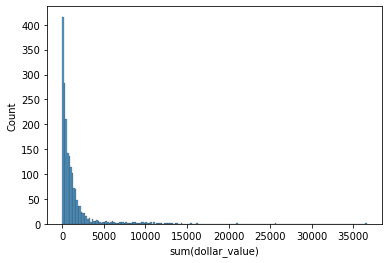

In [54]:
import seaborn as sns
sns.histplot(x = 'sum(dollar_value)', data=agg_data)

# Beaker line 